In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from tqdm import tqdm


from full_dynamics import FullSimulation

In [2]:
'''v_0 = 10.0
epsilons = np.linspace(3, 7, 10)
fs = []

test_sim = FullSimulation(N_x=200, N_theta = 15, v_0 = 8, L_x = 8.0, epsilon = 6.0, hump_width=0.5)
test_sim.set_random(0.6, 0.01)
test_sim.evolve(10.0)
test_sim.plot_history()
plt.show()

hysteresis_f_p = FullSimulation(N_x=200, N_theta = 15, v_0 = 10, L_x = 10, epsilon = 1.0, hump_width=0.5)
hysteresis_f_p.set_custom_dist(np.copy(test_sim.f))
hysteresis_f_p.evolve(100.0)
hysteresis_f_p.plot_history()
plt.show()

prev_dist = np.copy(hysteresis_f_p.f)
hysteresis_p_f = FullSimulation(N_x=200, N_theta = 15, v_0 = 8, L_x = 8, epsilon = 6.0, hump_width=0.5)
hysteresis_p_f.set_custom_dist(prev_dist)
hysteresis_p_f.evolve(500.0)
hysteresis_p_f.plot_history()

np.savez('partial_to_full_wetting', rho_hist = hysteresis_p_f.history_rho, J_hist = hysteresis_p_f.history_Fx)
'''

"v_0 = 10.0\nepsilons = np.linspace(3, 7, 10)\nfs = []\n\ntest_sim = FullSimulation(N_x=200, N_theta = 15, v_0 = 8, L_x = 8.0, epsilon = 6.0, hump_width=0.5)\ntest_sim.set_random(0.6, 0.01)\ntest_sim.evolve(10.0)\ntest_sim.plot_history()\nplt.show()\n\nhysteresis_f_p = FullSimulation(N_x=200, N_theta = 15, v_0 = 10, L_x = 10, epsilon = 1.0, hump_width=0.5)\nhysteresis_f_p.set_custom_dist(np.copy(test_sim.f))\nhysteresis_f_p.evolve(100.0)\nhysteresis_f_p.plot_history()\nplt.show()\n\nprev_dist = np.copy(hysteresis_f_p.f)\nhysteresis_p_f = FullSimulation(N_x=200, N_theta = 15, v_0 = 8, L_x = 8, epsilon = 6.0, hump_width=0.5)\nhysteresis_p_f.set_custom_dist(prev_dist)\nhysteresis_p_f.evolve(500.0)\nhysteresis_p_f.plot_history()\n\nnp.savez('partial_to_full_wetting', rho_hist = hysteresis_p_f.history_rho, J_hist = hysteresis_p_f.history_Fx)\n"

In [3]:
'''# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), width_ratios=[1, 1.1])

# First heatmap for hysteresis_f_p
U = np.sum(np.array(hysteresis_f_p.history_Fx), axis=2)
U = 1.3 * np.sign(U) * (1)/(1.0-np.log(np.abs(U)))
rho_f_p = hysteresis_f_p.history_rho
axes[0].imshow(rho_f_p, aspect='auto', origin='lower', cmap='coolwarm', vmin=0.0, vmax=1.0, extent=(0, 10, 0, 100))
#axes[0].set_title('Heatmap of rho (hysteresis_f_p)')
axes[0].set_xlabel(r'Spatial Position $x$')
axes[0].set_ylabel('Time $t$')
# Add arrows for U
axes[0].quiver(0.05*np.arange(U.shape[1])[::x_skip], 0.1*np.arange(U.shape[0])[::y_skip], U[::y_skip, ::x_skip], np.zeros_like(U[::y_skip, ::x_skip]), 
               color='white', width=0.005, alpha=0.8, scale=15)

# Second heatmap for hysteresis_p_f
U = np.sum(np.array(hysteresis_p_f.history_Fx), axis=2)
U = (0.05*np.minimum(1000*U,0*U+1))
#U = 2.0 * np.sign(U) * (1)/(1.0-np.log(np.abs(U)))
rho_p_f = hysteresis_p_f.history_rho
axes[1].imshow(rho_p_f, aspect='auto', origin='lower', cmap='coolwarm', vmin=0.0, vmax=1.0, extent=(0, 10, 0, 100))
axes[1].set_yticklabels(['0', '100', '200', '300', '400', '500'])
#axes[1].set_title('Heatmap of rho (hysteresis_p_f)')
axes[1].set_xlabel(r'Spatial Position $x$')
#axes[1].set_ylabel('Time $t$')
# Add arrows for U
axes[1].quiver(0.05*np.arange(U.shape[1])[::x_skip], 0.1*np.arange(U.shape[0])[::y_skip], U[::y_skip, ::x_skip], np.zeros_like(U[::y_skip, ::x_skip]), 
               color='white', width=0.005, alpha=0.8, scale=15)

# Add colorbars to the subplots



cbar1 = fig.colorbar(axes[1].images[0], ax=axes[1], orientation='vertical', fraction=0.06, pad=0.04)
cbar1.set_label(r'Density $\rho$')
# Adjust layout
plt.tight_layout()
plt.savefig('Fig4.png', dpi=500)
plt.show()'''

"# Create a figure with two subplots\nfig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), width_ratios=[1, 1.1])\n\n# First heatmap for hysteresis_f_p\nU = np.sum(np.array(hysteresis_f_p.history_Fx), axis=2)\nU = 1.3 * np.sign(U) * (1)/(1.0-np.log(np.abs(U)))\nrho_f_p = hysteresis_f_p.history_rho\naxes[0].imshow(rho_f_p, aspect='auto', origin='lower', cmap='coolwarm', vmin=0.0, vmax=1.0, extent=(0, 10, 0, 100))\n#axes[0].set_title('Heatmap of rho (hysteresis_f_p)')\naxes[0].set_xlabel(r'Spatial Position $x$')\naxes[0].set_ylabel('Time $t$')\n# Add arrows for U\naxes[0].quiver(0.05*np.arange(U.shape[1])[::x_skip], 0.1*np.arange(U.shape[0])[::y_skip], U[::y_skip, ::x_skip], np.zeros_like(U[::y_skip, ::x_skip]), \n               color='white', width=0.005, alpha=0.8, scale=15)\n\n# Second heatmap for hysteresis_p_f\nU = np.sum(np.array(hysteresis_p_f.history_Fx), axis=2)\nU = (0.05*np.minimum(1000*U,0*U+1))\n#U = 2.0 * np.sign(U) * (1)/(1.0-np.log(np.abs(U)))\nrho_p_f = hysteresis_

In [4]:
#test_evolution = FullSimulation(N_x=300, N_theta = 15, v_0 = 15, L_x = 12, epsilon = 6.5, hump_width=0.5)
#test_evolution.set_random(0.659, 0.001)
#test_evolution.evolve(1000.0)
#np.savez('full_to_partial_wetting', rho_hist=test_evolution.history_rho, J_hist=test_evolution.history_Fx)

In [5]:
def asymmetry(dist):
    rho = dist[1:-1]
    return np.sum(np.abs(rho - np.roll(np.flip(rho), +1)))*(12/300) / (12*(np.mean(rho) - np.min(rho)))

rho_hist = np.load('data/full_to_partial_wetting.npz')['rho_hist']
J_hist = np.load('data/full_to_partial_wetting.npz')['J_hist']
J_x_hist = np.sum(J_hist, axis=2)*(2*np.pi/15)

rho_p_f = np.load('data/partial_to_full_wetting.npz')['rho_hist']
J_p_f = np.load('data/partial_to_full_wetting.npz')['J_hist']

/var/folders/3q/bs71m3ns1kq5sjlny3rn8t5r0000gn/T/ipykernel_98902/2248937124.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.0)


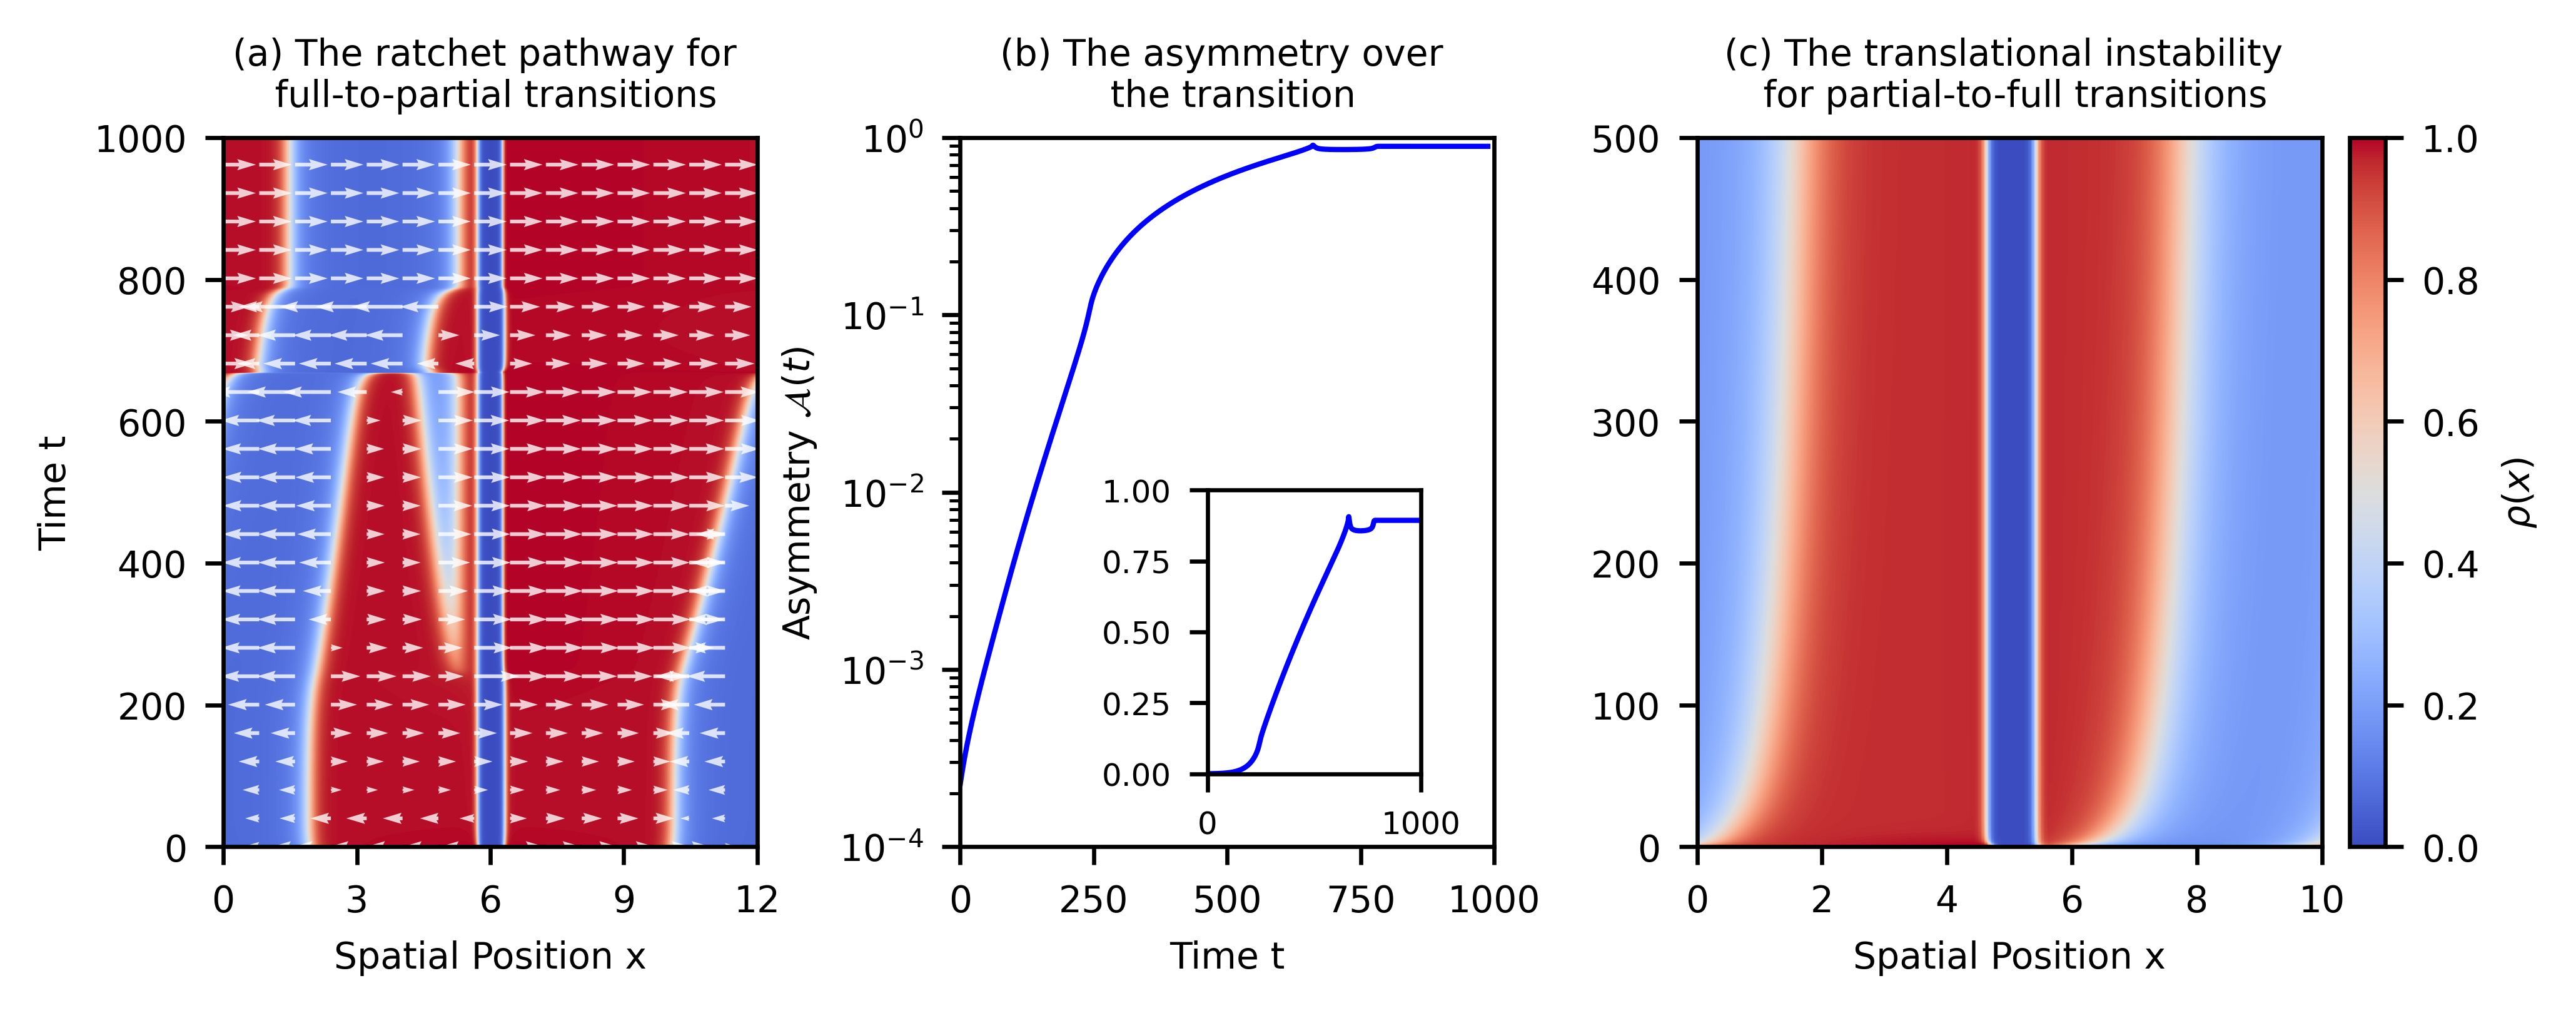

In [6]:
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

mpl.rcParams.update({'font.size': 7})

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(6.67, 2.5), dpi=600, gridspec_kw={'width_ratios': [1.0, 1.0, 1.3]})

# Example content for each subplot
axes[0].imshow(rho_hist[10:], aspect='auto', origin='lower', cmap='coolwarm', vmin=0.0, vmax=1.0, extent=(0, 12, 0, 1000))
axes[0].set_title('(a) The ratchet pathway for \n full-to-partial transitions', fontsize=7)
x_skip = 20
y_skip = 40
x_positions = np.linspace(0, 12, J_x_hist.shape[1])[::x_skip]
y_positions = np.linspace(0, 1000, J_x_hist.shape[0])[::y_skip]
X, Y = np.meshgrid(x_positions, y_positions)
J_x_hist_norm = (np.abs(J_x_hist)**0.25 * np.sign(J_x_hist))*0.002

U = J_x_hist_norm[10:][::y_skip, ::x_skip]*10**(3)
V = np.zeros_like(U)

axes[0].quiver(X, Y, U, V, color='white', scale_units='xy', scale=0.5, width=0.007, alpha=0.8)
axes[0].set_xlabel('Spatial Position x')
axes[0].set_ylabel('Time t')

axes[0].set_xlim(0, 12)
axes[0].set_xticks([0, 3, 6, 9, 12])



axes[1].set_yscale('log')
axes[1].set_ylim(1e-4, 1.0)
axes[1].set_xlabel('Time t')
axes[1].set_xlim(0, 1000)
axes[1].set_title('(b) The asymmetry over \n the transition', fontsize=7)


x_1 = np.linspace(0, 200, 200)
y_1 = 0.3*10**(-3) * np.exp(x_1/40)
#axes[1].plot(x_1, y_1, label=r'$\mathcal{A}(t) \sim e^{\lambda t}$', linestyle='--', linewidth=2.0, alpha=0.5)

x_2 = np.linspace(200, 700, 200)
y_2 = (x_2-170)/500 * 0.9
#axes[1].plot(x_2, y_2, label=r'$\mathcal{A}(t) \sim A_2 t$', linestyle='--', linewidth=2.0, alpha=0.5)

x_3 = np.linspace(700, 1000, 200)
y_3 = 0*x_3 + 0.9
#axes[1].plot(x_3, y_3, label=r'$\mathcal{A}(t) \sim A_3$', linestyle='--', linewidth=2.0, alpha=0.5)

axes[1].set_ylabel(r'Asymmetry $\mathcal{A}(t)$')
#axes[1].vlines(250, 1e-4, 1.0, color='orange', linestyle='--', linewidth=2.0, alpha=0.5)
#axes[1].vlines(650, 1e-4, 1.0, color='orange', linestyle='--', linewidth=2.0, alpha=0.5)
#axes[1].vlines(200, 1e-4, 1.0, color='orange', linestyle='--', linewidth=2.0, alpha=0.5)

axes[1].plot([asymmetry(dist) for dist in rho_hist[10:]], color='blue', label=r'$\mathcal{A}(t)$', linewidth=1.0)

# Add an inset with the same graph on a linear scale
inset_ax = inset_axes(axes[1], width="40%", height="40%", loc='lower right', borderpad=2.0)
inset_ax.plot([asymmetry(dist) for dist in rho_hist[10:]], color='blue', linewidth=1.0, label=r'$\mathcal{A}(t)$')
#inset_ax.plot(x_1, y_1, linestyle='--', linewidth=2.0, alpha=0.5)
#inset_ax.plot(x_2, y_2, linestyle='--', linewidth=2.0, alpha=0.5)
#inset_ax.plot(x_3, y_3, linestyle='--', linewidth=2.0, alpha=0.5)
inset_ax.set_ylim(0, 1)
inset_ax.set_xlim(0, 1000)
#inset_ax.set_title('(Linear Scale)', fontsize=6)
inset_ax.tick_params(axis='both', which='major', labelsize=6)
inset_ax.set_xticks([0, 1000])
inset_ax.set_xticklabels([0, 1000])
#axes[1].legend(loc = 'upper right')

axes[2].set_title('(c) The translational instability \n for partial-to-full transitions', fontsize=7)
axes[2].imshow(rho_p_f, origin='lower', cmap='coolwarm', vmin=0.0, vmax=1.0, extent=(0, 10, 0, 500), aspect='auto')
axes[2].colorbar = fig.colorbar(axes[2].images[0], ax=axes[2], orientation='vertical', fraction=0.06, pad=0.04)
axes[2].colorbar.set_label(r'$\rho(x)$')
axes[2].set_xlabel('Spatial Position x')

plt.tight_layout(pad=0.0)
#plt.savefig('Fig_pathway.pdf', dpi=600)
plt.show()

## Accessory stuff to do with the droplet bursting

In [8]:
'''test_f = FullSimulation(N_x=400, N_theta = 15, v_0 = 15, L_x = 12, epsilon = 2.0, hump_width=0.5)
test_f.set_random(0.659, 0.001)
test_f.evolve(1000.0, n_records=10000)
test_f.plot_history()'''

'test_f = FullSimulation(N_x=400, N_theta = 15, v_0 = 15, L_x = 12, epsilon = 2.0, hump_width=0.5)\ntest_f.set_random(0.659, 0.001)\ntest_f.evolve(1000.0, n_records=10000)\ntest_f.plot_history()'

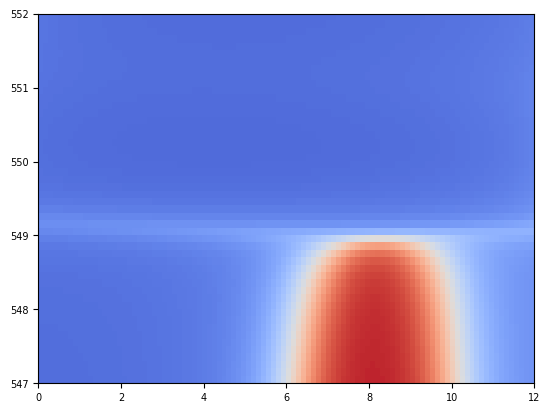

In [ ]:
'''t_1 = 547
t_2 = 552
plt.imshow(np.array(test_f.history_rho)[int(10*t_1):int(10*t_2), 60:160], aspect='auto', origin='lower', cmap='coolwarm', vmin=0.0, vmax=1.0, extent=(0, 12, t_1, t_2))'''

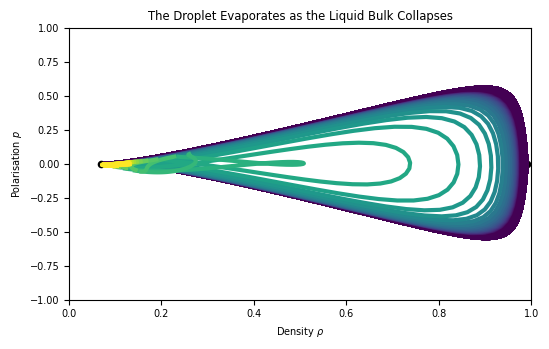

In [ ]:
'''rho = test_f.history_rho
p = test_f.history_p1
plt.figure(figsize=(5.5, 3.5))
for t in np.linspace(1000, 5530, int(5530-1000)):
    t = int(t)
    r_t = rho[int(t)][60:160]
    p_t = p[int(t)][60:160]
    #plt.plot(r_t, p_t, c='red', linewidth=3)
    plt.ylim(-1, 1)
    plt.xlim(0, 1)
    plt.plot(r_t, p_t, c=plt.cm.viridis((t - 5470) / 30), linewidth=3)
plt.xlabel(r'Density $\rho$')
plt.ylabel(r'Polarisation $p$')
plt.scatter([np.min(rho[1000]), np.max(rho[1000][0:160])], [0,0], c='black', s=20)
plt.title('The Droplet Evaporates as the Liquid Bulk Collapses')
plt.tight_layout()
plt.savefig('Fig_collapse.pdf')'''